In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
with open('newsela_article_corpus_2016-01-29/newsela_data_share-20150302/newsela_articles_20150302.5versions.sents.json','r') as f:
    data = json.loads(f.read())

norm_train_df = pd.json_normalize(data, record_path=['articles'], meta=[['category', 'name'], 'language'], errors='ignore')
print(f"Genres: {norm_train_df['category.name'].unique()}")
norm_train_df = norm_train_df[norm_train_df['language'] == 'en']
norm_train_df = norm_train_df[norm_train_df['category.name'] == 'Health'][['grade_level', 'sentences']]
# norm_train_df['sentences'] = norm_train_df.apply(lambda row: " ".join(row['sentences']), axis=1) # Convert each list of sentences into a plain text
norm_train_df.head()

Genres: ['War & Peace' 'Kids' 'Money' 'Science' 'Health' 'Law' 'Sports' 'Arts']


,grade_level,sentences
30,4.0,"[Chris Christie is governor of New Jersey ., I..."
31,5.0,[Chris Christie is the governor of New Jersey ...
32,6.0,[New Jersey Governor Chris Christie appeared o...
33,8.0,[New Jersey Governor Chris Christie chomped do...
34,12.0,[Governor Chis Christie of New Jersey chomped ...


In [4]:
norm_train_df.to_csv("newsela_health.csv", index=False)

<AxesSubplot:ylabel='Frequency'>

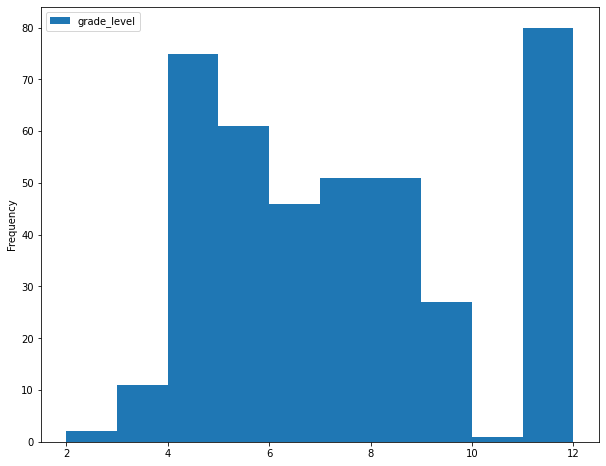

In [5]:
norm_train_df.plot.hist(column=['grade_level'], figsize=(10, 8))